<a href="https://colab.research.google.com/github/RAV10K1/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


# Confidence Intervals
## 1) Generate and numerically represent a confidence interval

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Getting data from UCI website and setting dataframe
url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df_votes = pd.read_csv(url, header=None, names=column_headers, na_values='?')
print(df_votes.shape)
df_votes.head(3)

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n


In [3]:
 # Encoding Y & N to binary values 1 & 0
 df_votes = df_votes.replace(to_replace={'y': 1, 'n': 0})
 df_votes.head(3)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [109]:
# Separating parties into two dataframes
df_dem = df_votes[df_votes['party']=='democrat']
df_rep = df_votes[df_votes['party']=='republican']
# Checking new dataframes
print(df_dem.shape)
print(df_dem.head(3))
print(df_rep.shape)
print(df_rep.head(3))

(267, 17)
      party  handicapped-infants  water-project  ...  crime  duty-free  south-africa
2  democrat                  NaN            1.0  ...    1.0        0.0           0.0
3  democrat                  0.0            1.0  ...    0.0        0.0           1.0
4  democrat                  1.0            1.0  ...    1.0        1.0           1.0

[3 rows x 17 columns]
(168, 17)
        party  handicapped-infants  ...  duty-free  south-africa
0  republican                  0.0  ...        0.0           1.0
1  republican                  0.0  ...        0.0           NaN
7  republican                  0.0  ...        NaN           1.0

[3 rows x 17 columns]


In [113]:
# Getting means for Democrats
dem_mean = df_dem.mean()
dem_mean

handicapped-infants     0.604651
water-project           0.502092
budget                  0.888462
physician-fee-freeze    0.054054
el-salvador-aid         0.215686
religious-groups        0.476744
anti-satellite-ban      0.772201
aid-to-contras          0.828897
mx-missile              0.758065
immigration             0.471483
synfuels                0.505882
education               0.144578
right-to-sue            0.289683
crime                   0.350195
duty-free               0.637450
south-africa            0.935135
dtype: float64

In [115]:
# Getting means for Republicans
rep_mean = df_rep.mean()
rep_mean

handicapped-infants     0.187879
water-project           0.506757
budget                  0.134146
physician-fee-freeze    0.987879
el-salvador-aid         0.951515
religious-groups        0.897590
anti-satellite-ban      0.240741
aid-to-contras          0.152866
mx-missile              0.115152
immigration             0.557576
synfuels                0.132075
education               0.870968
right-to-sue            0.860759
crime                   0.981366
duty-free               0.089744
south-africa            0.657534
dtype: float64

In [0]:
# Creating New Dataframe with mean support
df_means = pd.concat([dem_mean, rep_mean], join='outer', names=['Issue', 'Democrat', 'Republican'], axis=1)

In [0]:
# Renaming Columns
df_means = df_means.rename(columns={0:'Democrat', 1:'Republican'}, errors='raise')

In [118]:
# Checking dataframe
df_means.head(3)

,Democrat,Republican
handicapped-infants,0.604651,0.187879
water-project,0.502092,0.506757
budget,0.888462,0.134146


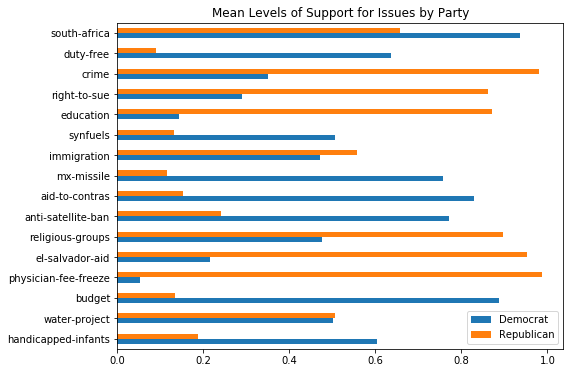

In [119]:
# Plotting chart to visualize mean support for issues
df_means.plot(kind='barh', title='Mean Levels of Support for Issues by Party', figsize=(8,6));

In [0]:
# Taking a look at the issue of Immigration

In [120]:
# Performing ttest for the issue of immigration
from scipy.stats import ttest_ind
ttest_ind(df_dem['immigration'], df_rep['immigration'], nan_policy='omit')

Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)

In [0]:
# Null Hypothesis (H0) : Democrat support for immigration == Republican support for immigration
# Alternative Hypothesis (H1) : Democrat support for immigration =/= Republican support for immigration 
# At a 95% Confidence Level where the P-Value < 0.05 the ttest indicates a P-Value of 0.083 which is greater than 0.05
# Thereby we reject the Null Hypothesis (H0) which indicates that the level of support for immigration from both parties is different.

* Null Hypothesis (H0) : Democrat support for immigration == Republican support for immigration
* Alternative Hypothesis (H1) : Democrat support for immigration =/= Republican support for immigration 
* At a 95% Confidence Level where the P-Value < 0.05 the ttest indicates a P-Value of 0.083 which is greater than 0.05
* Thereby we reject the Null Hypothesis (H0) which indicates that the level of support for immigration from both parties is different.

In [0]:
# Defining a function to calculate confidence intervals (Taken from lecture notebook with modification to len() method to disregard NaN values)
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = np.array(data)
    data_mean = np.mean(data)
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
    return (data_mean, data_mean - moe, data_mean + moe)

In [133]:
# Calculating confidence level
party_im = df_rep['immigration']
CI = confidence_interval(party_im)
print(CI)

(0.5575757575757576, nan, nan)


## 2) Graphically (with a plot) represent the confidence interval


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


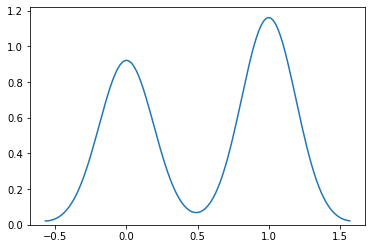

In [129]:
# Calculating confidence level
sns.kdeplot(party_im)
plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r')
plt.axvline(x=CI[0], color='k');

## 3) Interpret the confidence interval - what does it tell you about the data and its distribution?

# Chi-squared tests:


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)